 # Case Study: How Does a Bike-Share Navigate Speedy Success?
 Report by Natalia \
 last updated on 15.12.2022

**Ask**

Cyclistic has updated its company goal: _design marketing strategies aimed at converting casual riders into annual members._

The part assigned to a data analyst in this case is to answer the question
<br>
<br>

<div align="center"><b> How do annual members and casual riders use Cyclistic bikes differently? </b></div>
<br>
given the answer should be data-driven based on the information over the last year (2019). Data insights and visualisations are a part of that answer.

_Key stakeholders_ are Cyclistic executives, director of marketing, who is also the direct superior, and the marketing analytics team.

**Prepare**
* Data is taken from [open data source](https://divvy-tripdata.s3.amazonaws.com/index.html).
* Data is stored in csv files and zip archives, either on monthly or quarterly basis respectively.
* The initial dataset has 12 variables. Since there is some demographic data, there is certainly a possibility to find meaningful trends.

**Process**

Data processing has been done by using a jupyter notebook and appropriate python libraries. These tools fit well since
* pandas can effectively process the given amount of data and 
* jupyter notebook allows to create slideshows, which are easy to follow along the main points and deep dive into the coding part.
<br>
<br>

As for the cleaning part, some csv files had deviating column names, missing values and incorrect data format. To ensure the data integrity,
* column names have been unified,
* observations with missing values have been erased,
* data format has been fixed,
* two new columns _"ride_length"_ and _"weekday"_ have been added to amplify consistency.
<br>    

* The data has been verified after every major manipulation by computational means.
* The entire data cleaning process is stored in the cells below and supplied with comments.
* The data has been cleaned, merged into a single dataset _"trips_v1.csv"_ and sorted by the column _"trip_id"_ in ascending order.

In [148]:
# libraries used
import pandas as pd
import numpy as np
from matplotlib import cm
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from collections import Counter
import matplotlib.pyplot as plt

In [40]:
# read data to csv
df1 = pd.read_csv("Divvy_Trips_2019_Q2.csv")
df2 = pd.read_csv("Divvy_Trips_2019_Q3.csv")
df3 = pd.read_csv("Divvy_Trips_2019_Q4.csv")
df4 = pd.read_csv("Divvy_Trips_2019_Q1.csv")

# explore every dataset with df.head(), df.tail(), df.columns
# df1 is problematic at first look

In [42]:
# changes to df1 - unified column names
df1.rename(columns={'01 - Rental Details Rental ID': 'trip_id',
                    '01 - Rental Details Local Start Time': 'start_time',
                    '01 - Rental Details Local End Time': 'end_time',
                    '01 - Rental Details Bike ID': 'bikeid',
                    '01 - Rental Details Duration In Seconds Uncapped': 'tripduration',
                    '03 - Rental Start Station ID': 'from_station_id',
                    '03 - Rental Start Station Name': 'from_station_name',
                    '02 - Rental End Station ID': 'to_station_id',
                    '02 - Rental End Station Name': 'to_station_name',
                    'User Type': 'usertype',
                    'Member Gender': 'gender',
                    '05 - Member Details Member Birthday Year': 'birthyear'},
           inplace=True)

In [45]:
# merge 4 datasets for 4 quartals of 2019 into one dataset
all_trips = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [51]:
# unify columns names
all_trips.rename(columns={'bikeid': 'bike_id',
                          'tripduration': 'trip_duration',
                          'usertype': 'user_type',
                          'birthyear': 'birth_year'},
                   inplace=True)

In [53]:
# check for missing values
all_trips.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bike_id                   0
trip_duration             0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
user_type                 0
gender               559206
birth_year           538751
dtype: int64

In [54]:
# drop missing values
clean_trips = all_trips.dropna(axis=0, how='any', inplace=False)

In [63]:
# quick check
print(clean_trips.isnull().sum())
clean_trips.info()

trip_id              0
start_time           0
end_time             0
bike_id              0
trip_duration        0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
user_type            0
gender               0
birth_year           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258796 entries, 0 to 3258795
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bike_id            int64  
 4   trip_duration      object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   user_type          object 
 10  gender             object 
 11  birth_year         float64
dtypes: float64(1), int64(4), object(7)
memory usage: 298.4+ MB


In [60]:
# sort the cleaned df
clean_trips.sort_values(by=["trip_id"], ascending=True, inplace=True, ignore_index=True)

/Users/andrei.bazarenko/anaconda3/envs/maps/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [106]:
# check data types and correct them where appropriate
clean_trips.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bike_id                       int64
trip_duration               float64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
user_type                    object
gender                       object
birth_year                    int64
dtype: object

In [79]:
clean_trips.birth_year = clean_trips.birth_year.astype(int)

/Users/andrei.bazarenko/anaconda3/envs/maps/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [94]:
clean_trips.trip_duration = clean_trips.trip_duration.str.replace(',', '').astype(float)


/Users/andrei.bazarenko/anaconda3/envs/maps/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [101]:
clean_trips['start_time'] = pd.to_datetime(clean_trips['start_time'].str.strip(),
                                                         format='%Y/%m/%d %H:%M:%S')

/var/folders/5j/8vpr0dc917z6_f6bqldpnx280000gq/T/ipykernel_31748/4105319507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_trips['start_time'] = pd.to_datetime(clean_trips['start_time'].str.strip(),


In [104]:
clean_trips['end_time'] = pd.to_datetime(clean_trips['end_time'].str.strip(),
                                                         format='%Y/%m/%d %H:%M:%S')

/var/folders/5j/8vpr0dc917z6_f6bqldpnx280000gq/T/ipykernel_31748/1824091957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_trips['end_time'] = pd.to_datetime(clean_trips['end_time'].str.strip(),


In [116]:
clean_trips.to_csv("trips.csv", index_label=False)

In [26]:
df=pd.read_csv("trips.csv")
df.head()

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birth_year
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783.0,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994


In [27]:
df.dtypes

trip_id                int64
start_time            object
end_time              object
bike_id                int64
trip_duration        float64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
user_type             object
gender                object
birth_year             int64
dtype: object

In [71]:
df['start_time']=pd.to_datetime(df['start_time'].str.strip(),
                                                         format='%Y/%m/%d %H:%M:%S')
df['end_time'] = pd.to_datetime(df['end_time'].str.strip(),
                                                         format='%Y/%m/%d %H:%M:%S')

In [72]:
# add new column for ride length
df['ride_length'] = df['end_time'] - df['start_time']

In [73]:
df['start_date'] = pd.to_datetime(df['start_time']).dt.date
df['started_at'] = pd.to_datetime(df['start_time']).dt.time
df['end_date'] = pd.to_datetime(df['end_time']).dt.date
df['ended_at'] = pd.to_datetime(df['end_time']).dt.time

In [32]:
# add new column for a weekday when ride has started
# df['weekday'] = df['start_time'].dt.dayofweek - gives numbers for days, but I wanna see day names so
df['weekday'] = df['start_time'].dt.day_name()

In [34]:
df['ride_length_float'] = df['ride_length'] / pd.offsets.Minute(1)

In [35]:
df.describe()

,trip_id,bike_id,trip_duration,from_station_id,to_station_id,birth_year,ride_length,ride_length_float
count,3.258796e+06,3.258796e+06,3.258796e+06,3.258796e+06,3.258796e+06,3.258796e+06,3258796,3.258796e+06
mean,2.391703e+07,3.390371e+03,1.070853e+03,2.049440e+02,2.054959e+02,1.984083e+03,0 days 00:17:51.119631606,1.785199e+01
std,1.241564e+06,1.905420e+03,2.077400e+04,1.559652e+02,1.556257e+02,1.085970e+01,0 days 05:46:12.558607595,3.462093e+02
min,2.174244e+07,1.000000e+00,6.100000e+01,2.000000e+00,2.000000e+00,1.759000e+03,-1 days +23:03:38,-5.636667e+01
25%,2.282444e+07,1.735000e+03,3.800000e+02,8.100000e+01,8.100000e+01,1.979000e+03,0 days 00:06:20,6.333333e+00
50%,2.397144e+07,3.465000e+03,6.310000e+02,1.760000e+02,1.760000e+02,1.987000e+03,0 days 00:10:31,1.051667e+01
75%,2.501124e+07,5.061000e+03,1.076000e+03,2.910000e+02,2.930000e+02,1.992000e+03,0 days 00:17:56,1.793333e+01
max,2.596290e+07,6.946000e+03,9.056633e+06,6.730000e+02,6.730000e+02,2.014000e+03,104 days 19:43:54,1.509439e+05


In [74]:
# start_time < end_time, erase these rows
df_distortion = df.loc[(df['ride_length'] < (df['start_time']-df['end_time']))]

In [76]:
# drop the rows
df.drop(index=[2961764,2961769,2961770,2961771,2961773,2961775,2961776,2961777], inplace = True)

In [86]:
# the max for ride_length is too big. check it.
print(df['ride_length'].max())
print(df['ride_length'].idxmax())
df[1490131:1490132]

104 days 19:43:54
1490131


,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birth_year,ride_length,start_date,started_at,end_date,ended_at,weekday,ride_length_float
1490131,23798837,2019-07-16 18:17:58,2019-10-29 14:01:52,1229,9056633.0,418,Ellis Ave & 53rd St,671,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),Subscriber,Male,1999,104 days 19:43:54,2019-07-16,18:17:58,2019-10-29,14:01:52,Tuesday,150943.9


In [90]:
# saving changes
df.to_csv("trips_v1.csv", index_label=False)

**Analyze**
* The ready to work with clean merged dataset contains 19 variables.
* Upon further inspection there have been found unlogical observations where _start_time_ > _end_time_. These observations have been erased, so the total number of observations has reduced to 3.258.788.
<br>

* The dataset has been aggregated in different subsets to calculate statistics and draw graphs.
* Average ride length is *18 minutes*. 
* Minimum trip duration is *1 minute*. Looks like someone did not like the bicycle and put it back right away.
* There is an interesting outlier in the dataset - a male subscriber rented out a bicycle for *100 days*, probably for a prolonged country trip.

In [2]:
df=pd.read_csv("trips_v1.csv")
df.head()

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birth_year,ride_length,start_date,started_at,end_date,ended_at,weekday,ride_length_float
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,0 days 00:06:30,2019-01-01,00:04:37,2019-01-01,00:11:07,Tuesday,6.500000
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,0 days 00:07:21,2019-01-01,00:08:13,2019-01-01,00:15:34,Tuesday,7.350000
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,0 days 00:13:49,2019-01-01,00:13:23,2019-01-01,00:27:12,Tuesday,13.816667
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783.0,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,0 days 00:29:43,2019-01-01,00:13:45,2019-01-01,00:43:28,Tuesday,29.716667
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,0 days 00:06:04,2019-01-01,00:14:52,2019-01-01,00:20:56,Tuesday,6.066667


In [93]:
# conduct descriptive analysis
df.describe()

,trip_id,bike_id,trip_duration,from_station_id,to_station_id,birth_year,ride_length_float
count,3.258788e+06,3.258788e+06,3.258788e+06,3.258788e+06,3.258788e+06,3.258788e+06,3.258788e+06
mean,2.391703e+07,3.390369e+03,1.070854e+03,2.049437e+02,2.054960e+02,1.984083e+03,1.785215e+01
std,1.241562e+06,1.905421e+03,2.077403e+04,1.559651e+02,1.556258e+02,1.085970e+01,3.462097e+02
min,2.174244e+07,1.000000e+00,6.100000e+01,2.000000e+00,2.000000e+00,1.759000e+03,1.016667e+00
25%,2.282443e+07,1.735000e+03,3.800000e+02,8.100000e+01,8.100000e+01,1.979000e+03,6.333333e+00
50%,2.397144e+07,3.465000e+03,6.310000e+02,1.760000e+02,1.760000e+02,1.987000e+03,1.051667e+01
75%,2.501124e+07,5.061000e+03,1.076000e+03,2.910000e+02,2.930000e+02,1.992000e+03,1.793333e+01
max,2.596290e+07,6.946000e+03,9.056633e+06,6.730000e+02,6.730000e+02,2.014000e+03,1.509439e+05


In [112]:
# calculate the mean of ride_length
new_line = '\n'
print(f"Descriptive statistics of 'ride_length': {new_line}\
    mean = {round(df.ride_length_float.mean(),2)} minutes {new_line}\
    max ride duration = {round(df.ride_length_float.max(),2)} minutes {new_line}\
    min ride duration = {round(df.ride_length_float.min(),2)}, minutes")

Descriptive statistics of 'ride_length': 
    mean = 17.85 minutes 
    max ride duration = 150943.9 minutes 
    min ride duration = 1.02, minutes


In [145]:
# calculate the mode of day_of_week
data = Counter(df['weekday'])
data.most_common()   # returns all unique items and their counts

[('Tuesday', 529641),
 ('Wednesday', 527461),
 ('Thursday', 524395),
 ('Friday', 500570),
 ('Monday', 495981),
 ('Saturday', 363238),
 ('Sunday', 317502)]

In [179]:
df['user_type'] = df['user_type'].astype('category')

In [183]:
# calculate the average ride_length for members and casual riders. Try rows = member_casual; Values = Average
# of ride_length.
avg_ride_length_by_member_type = pd.pivot_table(df, values ='ride_length_float', index =['user_type'],
                                                aggfunc = np.average)
avg_ride_length_by_member_type

,ride_length_float
user_type,
Customer,47.824274
Subscriber,14.312815


In [192]:
# calculate the average ride_length for users by day_of_week. Try columns = day_of_week; Rows =
# member_casual; Values = Average of ride_length.
avg_ride_length_by_weekday = pd.pivot_table(df, values ='ride_length_float', index =['user_type'],
                                            columns=['weekday'], aggfunc = np.average)
avg_ride_length_by_weekday

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
user_type,,,,,,,
Customer,57.952148,50.651602,43.060100,48.859817,43.229965,50.156675,42.941394
Subscriber,13.883713,14.227038,16.293726,15.385942,13.764192,14.142060,13.796375


In [6]:
# calculate the number of rides for users by day_of_week by adding Count of trip_id to Values.
avg_ride_length_by_weekday_w_trip_ids = pd.pivot_table(df, values = ['trip_id'],
                                                       index =['user_type'], 
                                                       columns=['weekday'], aggfunc = 'count')
avg_ride_length_by_weekday_w_trip_ids

trip_id                                                    
weekday     Friday  Monday Saturday  Sunday Thursday Tuesday Wednesday
user_type                                                             
Customer     47117   40665    78590   63527    41114   36397     36769
Subscriber  453453  455316   284648  253975   483281  493244    490692

In [140]:
df.start_date = pd.to_datetime(df.start_date)

In [141]:
quarter_df = df.groupby([pd.Grouper(key = 'start_date', freq = 'Q'),
                         pd.Grouper('user_type')]).size()

**Share**

* There is no major difference in bicycle usage depending on a *weekday*; a *slight reduction* is observed during *weekend*, while the *busiest* days are *Tuesday, Wednesdays and Thursdays*.
* *Customer's ride length* is approximately *3,5 times larger* than that of subscribers.
* As for the ride lengths on certain weekdays, *subscribers* stick to spending similar amount of time cycling *every day*. *Customers*, on the other hand, like cycling the most on *Sundays*. 
<br>

* On the whole a *customer's trip* by bycicle takes about *3 times longer* compared to that of subscriber. However, the vast majority of ride is carried out by subscribers, while *customers* enjoy a very humble share at *about 10%*.
* In general, the quarter numbers show that the bicycles are used *less during the cold time of the year* - 1st and 4th quarters. During the 2nd quarter the demand for bike rides *doubles* compared to the 1st quarter, and then *peaks in the 3rd quarter* at 214,116 for customers and at 1.139,252 for subscribers.

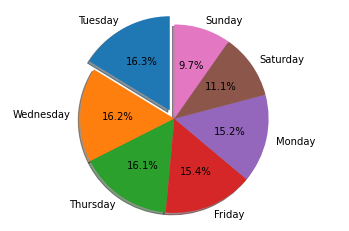

In [165]:
# viz Bicycle usage per weekday
labels = ('Tuesday','Wednesday','Thursday','Friday','Monday','Saturday','Sunday')
sizes = [529641, 527461, 524395, 500570, 495981, 363238, 317502]
explode = (0.1, 0.0, 0.0, 0, 0, 0, 0)

fig11, ax11 = plt.subplots()
ax11.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax11.axis('equal')
#plt.title('Bicycle usage per weekday')
plt.show()

In [197]:
# viz Average ride length by user type
colors = ['yellow', 'yellowgreen']

pivot_table = [go.Bar(x=avg_ride_length_by_member_type.index,
                      y=avg_ride_length_by_member_type.values.flatten(),
                      marker_color=colors)]

my_layout = {'title': 'Average ride length by user type',
             'xaxis': {'title': 'user type'},
             'yaxis': {'title': 'average ride length in minutes'},}

fig = go.Figure(data=pivot_table, layout=my_layout)

fig.show()

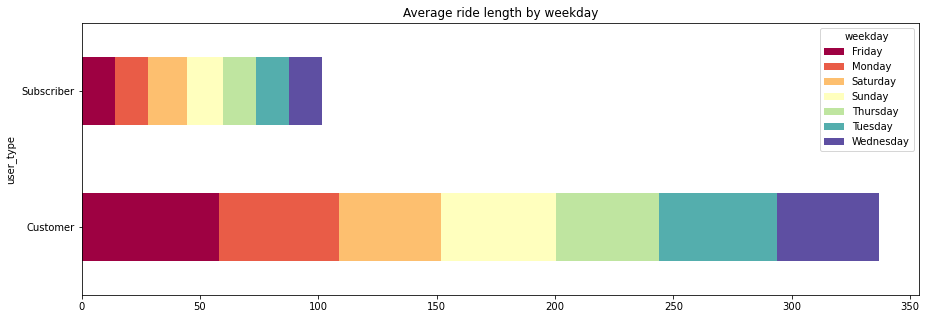

In [223]:
# viz Average ride length by weekday
cmap = cm.get_cmap('Spectral')
ax2 = avg_ride_length_by_weekday.plot(kind='barh', stacked=True, figsize=(15, 5), cmap=cmap, edgecolor='None',
                                      title='Average ride length by weekday')

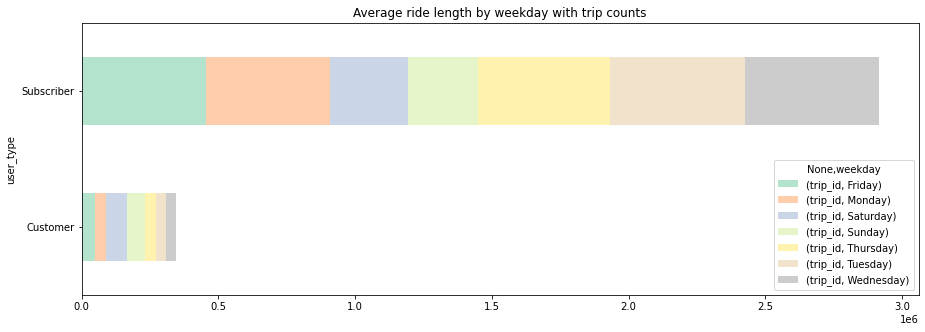

In [26]:
# viz Average ride length by weekday with trip counts
cmap = cm.get_cmap('Pastel2')
ax3 = avg_ride_length_by_weekday_w_trip_ids.plot(kind='barh', stacked=True, figsize=(15, 5), cmap=cmap, 
                                                 edgecolor='None',
                                                 title='Average ride length by weekday with trip counts')

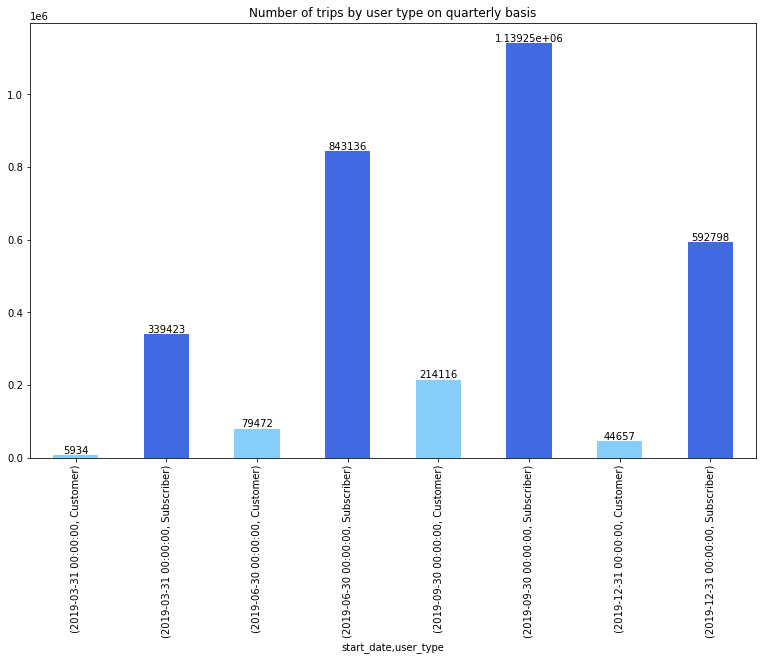

In [143]:
# viz Number of trips by user type on quarterly basis
colors = ["lightskyblue","royalblue"]
ax10 = quarter_df.plot(kind='bar', figsize=(13, 8),
                      color=colors,title='Number of trips by user type on quarterly basis')
for container in ax10.containers:
    ax10.bar_label(container)

**Act**

To summarize: 
* The analysis has shown that the ratio of customers to subscribers is incredibly low.
* Customers spend considerably more time riding a bicycle.
* Sundays are the most popular days to ride a bycicle for customers.
* The quarterly bicycle usage by both customers and subscribers follows a similar trend.
<br>

Next steps:
* Bicycle riding has to be made more attractive to ride by customers.
* Marketing campaigns should be launched throughout 2nd and 3rd quarters to boost awareness and animate more customers to try out bycicles.
* When attracting more customers, it is important to ensure that enough bycicles are positioned at bycicle stations. If the demand exceeds the offering, empty bycicle stations can have a negative effect on the customers' attitutude towards the company. This could cancel out the efforts of the marketing campaign.
<br>

**Limitations**
* further analysis of the effect of gender and age on the trends can be carried out to explore other relationships between the variables and possibly gain insights from it to tailor the marketing campaign more precisely.
* since sales data are missing from the dataset, there is no way to determine the impact of the user type ratio on the overall company performance.